In [113]:
import os

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 100)

Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [114]:
df_raw = pd.read_csv('fatal-police-shootings-data.csv', index_col=False)
df_raw.head()

,id,name,date,manner_of_death,armed,...,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,...,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,...,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,...,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,...,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,...,CO,False,attack,Not fleeing,False


Przekształcenie daty na odpowiedni format

In [115]:
df_raw['date'] = pd.to_datetime(df_raw['date'])

In [116]:
# df_raw.info()

In [117]:
df = df_raw[['race','signs_of_mental_illness']].groupby(['race','signs_of_mental_illness']).value_counts().to_frame()
df

count
race signs_of_mental_illness       
A    False                       69
     True                        24
B    False                     1114
     True                       184
H    False                      745
     True                       157
N    False                       64
     True                        14
O    False                       37
     True                        11
W    False                     1763
     True                       713

Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [118]:
df.reset_index(inplace=True)

In [119]:
table = pd.pivot_table(df, values='count', index = ['race'], columns=['signs_of_mental_illness'],aggfunc='sum')
table

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [120]:
def mental_percentage(table):
    return (100*table[True]/(table[False]+table[True])).round(1)
table['mental_percantage [%]'] = table.apply(mental_percentage, axis=1)
table

signs_of_mental_illness,False,True,mental_percantage [%]
race,,,
A,69,24,25.8
B,1114,184,14.2
H,745,157,17.4
N,64,14,17.9
O,37,11,22.9
W,1763,713,28.8


Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [121]:
f"The race with most percentage of mental illness people shot is: {table['mental_percantage [%]'].idxmax()}."

'The race with most percentage of mental illness people shot is: W.'

Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [122]:
# df_raw['date'].dt.day_name().head()

In [123]:
df_weekdays = df_raw['date'].copy().dt.day_name().to_frame(name='weekdays')
days_names = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekdays = df_weekdays.copy().groupby('weekdays').value_counts().reindex(days_names).to_frame()
df_weekdays

,count
weekdays,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


In [124]:
f"Most suspects were shot at {df_weekdays['count'].idxmax()}s."

'Most suspects were shot at Wednesdays.'

<AxesSubplot: xlabel='weekdays'>

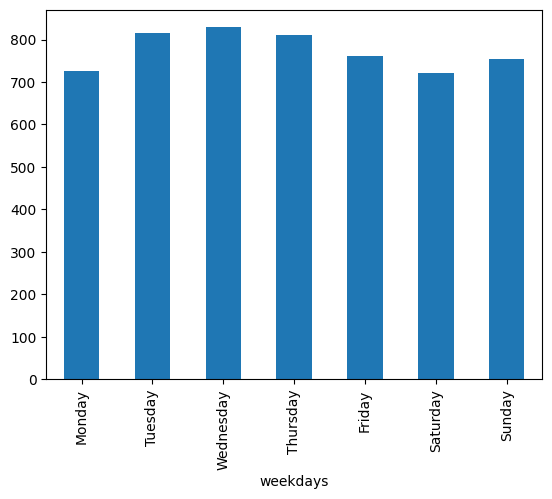

In [125]:
df_weekdays['count'].plot.bar(x='weekdays', y='count')

Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [126]:
try:
    us_population = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")[0]
    if os.path.exists('us_population.csv') == False:
        us_population.to_csv('us_population.csv', index=False)
except:
    us_population = pd.read_csv('us_population.csv', index_col=False)
us_population.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]",...,"Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,...,+2284267,52,732189,760350,11.80%
1,2,2,Texas,29145505,25145561,...,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,...,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,...,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,...,+300321,17,684353,764865,3.88%


In [127]:
try:
    us_states_html = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations", skiprows=9)
    us_states = us_states_html[0]
    if os.path.exists('us_states.csv') == False:
        us_states.to_csv('us_states.csv', index=False)
except:
    us_states = pd.read_csv('us_states.csv', index_col=False)
# us_states.drop([0,1],inplace=True)

In [128]:
us_states.head()

,Name and status of region,Name and status of region.1,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[1]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN


In [129]:
shot_per_state = df_raw['state'].copy().to_frame()
shot_per_state.columns = ['state_name_abbreviation']

In [130]:
states_abbreviations = us_states[['ANSI', 'Name and status of region']].copy()
states_abbreviations.columns = ['state_name_abbreviation', 'state_name']
states_abbreviations

,state_name_abbreviation,state_name
0,NaN,NaN
1,US,United States of America
2,AL,Alabama
3,AK,Alaska
4,AZ,Arizona
...,...,...
74,NaN,Nebraska
75,NaN,Northern Mariana Islands
76,NaN,Panama Canal Zone
77,NaN,Philippine Islands


In [131]:
states_population = us_population[['State', 'Census population, April 1, 2020 [1][2]']].copy()
states_population.columns = ['state_name', 'state_population']
states_population.sort_values(by=['state_name'],inplace=True)
states_population.head()

,state_name,state_population
23,Alabama,5024279
48,Alaska,733391
54,American Samoa,49710
13,Arizona,7151502
33,Arkansas,3011524


In [132]:
# states_abbreviations.sort_values(by=['state_name'],inplace=True)

In [133]:
states_data = states_abbreviations.merge(states_population, on='state_name')
states_data.head()

,state_name_abbreviation,state_name,state_population
0,AL,Alabama,5024279
1,AK,Alaska,733391
2,AZ,Arizona,7151502
3,AR,Arkansas,3011524
4,CA,California,39538223


In [134]:
people_shot = shot_per_state.groupby('state_name_abbreviation').value_counts().reset_index()
people_shot.rename({'count': 'crimes_count'}, axis=1, inplace=True)
people_shot.head()

,state_name_abbreviation,crimes_count
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799


In [135]:
states_shootings_data = states_data.merge(people_shot, on='state_name_abbreviation').fillna(0)
states_shootings_data.head()

,state_name_abbreviation,state_name,state_population,crimes_count
0,AL,Alabama,5024279,104
1,AK,Alaska,733391,39
2,AZ,Arizona,7151502,254
3,AR,Arkansas,3011524,83
4,CA,California,39538223,799


In [136]:
states_shootings_data['crimes_per_thousand'] = (1e3*states_shootings_data['crimes_count']/states_shootings_data['state_population']).round(3)
states_shootings_data.sort_values(by=['crimes_per_thousand'],ascending=False,inplace=True)

states_shootings_data.reset_index(inplace=True, drop=True)
states_shootings_data

,state_name_abbreviation,state_name,state_population,crimes_count,crimes_per_thousand
0,AK,Alaska,733391,39,0.053
1,NM,New Mexico,2117522,106,0.050
2,OK,Oklahoma,3959353,164,0.041
3,AZ,Arizona,7151502,254,0.036
4,CO,Colorado,5773714,195,0.034
5,NV,Nevada,3104614,96,0.031
6,WV,West Virginia,1793716,54,0.030
7,MT,Montana,1084225,31,0.029
8,AR,Arkansas,3011524,83,0.028
9,WY,Wyoming,576851,14,0.024


In [137]:
print(f"The state with highest number of people shot per capita was {states_shootings_data['state_name'].loc[states_shootings_data['crimes_per_thousand'].idxmax()]}.")

The state with highest number of people shot per capita was Alaska.


In [138]:
states_shootings_data.to_csv('results.csv', index=False)